In [1]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image

from netCDF4 import Dataset
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [2]:
# split number is 3

FILEDIR1 = '/n/home12/hongwei/HONGWEI/sensitive_test/1D_plume_split_number/merra2_2x25_standard_N3/'
NcFile1   = Dataset(FILEDIR1+'GEOSChem.SpeciesConc_inst.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
EU1              = NcFile1.variables['SpeciesConc_PASV_EU']
LA1              = NcFile1.variables['SpeciesConc_PASV_LA']



# split number is 5
FILEDIR2 = '/n/home12/hongwei/HONGWEI/sensitive_test/1D_plume_split_number/merra2_2x25_standard_N5/'
NcFile2   = Dataset(FILEDIR2+'GEOSChem.SpeciesConc_inst.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
EU2              = NcFile2.variables['SpeciesConc_PASV_EU']
LA2              = NcFile2.variables['SpeciesConc_PASV_LA']



# split number is 7
FILEDIR3 = '/n/home12/hongwei/HONGWEI/sensitive_test/1D_plume_split_number/merra2_2x25_standard_N7/'
NcFile3   = Dataset(FILEDIR3+'GEOSChem.SpeciesConc_inst.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
EU3              = NcFile3.variables['SpeciesConc_PASV_EU']
LA3              = NcFile3.variables['SpeciesConc_PASV_LA']



LA3

<class 'netCDF4._netCDF4.Variable'>
float32 SpeciesConc_PASV_LA(time, lev, lat, lon)
    long_name: Dry mixing ratio of species PASV_LA
    units: mol mol-1 dry
    _FillValue: -1e+31
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (31, 72, 91, 144)
filling off

In [3]:
#------------------------------------------------
# total area in each grid  ------------------
#------------------------------------------------ 
GC_AREA = NcFile1.variables['AREA']


#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------

AD_file = open(FILEDIR1+'State_Met_AD.txt','r')

GC_AD = EU1[0,:,:,:]*0.0

Nx = len(EU1[0,0,0,:])
Ny = len(EU1[0,0,:,0])
Nz = len(EU1[0,:,0,0])
Nt = len(EU1[:,0,0,0])

for ix in range(Nx):
    for iy in range(Ny):
        for iz in range(Nz):
            line = AD_file.readline()
            GC_AD[iz,iy,ix] = float(line)
            

In [4]:
### change unit, do average

EU1_molec = EU1[:,:,:,:]*0.0
for i in range(Nt):
    EU1_molec[i,:,:,:] = EU1[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU1_Zsum = np.sum(EU1_molec[:,:,:,:], axis=1)
for i in range(Nt):
    EU1_Zsum[i,:,:] = EU1_Zsum[i,:,:]/GC_AREA[:,:]/1e4 # [molec/cm2]

EU1_Zsum_Xmean = np.mean(EU1_Zsum[:,:,:], axis=2)



LA1_molec = LA1[:,:,:,:]*0.0
for i in range(Nt):
    LA1_molec[i,:,:,:] = LA1[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA1_Zsum = np.sum(LA1_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA1_Zsum[i,:,:]   = LA1_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA1_Zsum_Xmean = np.mean(LA1_Zsum[:,:,:], axis=2)


In [5]:
EU2_molec = EU2[:,:,:,:]*0.0
for i in range(Nt):
    EU2_molec[i,:,:,:] = EU2[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU2_Zsum = np.sum(EU2_molec[:,:,:,:], axis=1)
for i in range(Nt):
    EU2_Zsum[i,:,:] = EU2_Zsum[i,:,:]/GC_AREA[:,:]/1e4 # [molec/cm2]

EU2_Zsum_Xmean = np.mean(EU2_Zsum[:,:,:], axis=2)



LA2_molec = LA2[:,:,:,:]*0.0
for i in range(Nt):
    LA2_molec[i,:,:,:] = LA2[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA2_Zsum = np.sum(LA2_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA2_Zsum[i,:,:]   = LA2_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA2_Zsum_Xmean = np.mean(LA2_Zsum[:,:,:], axis=2)

In [6]:
EU3_molec = EU3[:,:,:,:]*0.0
for i in range(Nt):
    EU3_molec[i,:,:,:] = EU3[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU3_Zsum = np.sum(EU3_molec[:,:,:,:], axis=1)
for i in range(Nt):
    EU3_Zsum[i,:,:] = EU3_Zsum[i,:,:]/GC_AREA[:,:]/1e4 # [molec/cm2]

EU3_Zsum_Xmean = np.mean(EU3_Zsum[:,:,:], axis=2)



LA3_molec = LA3[:,:,:,:]*0.0
for i in range(Nt):
    LA3_molec[i,:,:,:] = LA3[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA3_Zsum = np.sum(LA3_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA3_Zsum[i,:,:]   = LA3_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA3_Zsum_Xmean = np.mean(LA3_Zsum[:,:,:], axis=2)

In [7]:
# delete original variable to save memory
del EU1, LA1, EU2, LA2, EU3, LA3

Total mass [molec] in the end: 
GEOS-Chem         = 1.099079797329895e+31
plume model 2*2.5 = 1.0994236158329933e+31
plume model 4*5   = 1.0994236158329933e+31


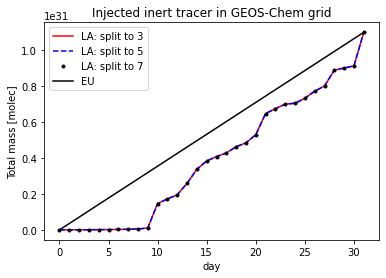

In [8]:


t = Nt-1
print(f'Total mass [molec] in the end: ')
print(f'GEOS-Chem         = {np.sum(EU1_molec[t,:,:,:])}')
print(f'plume model 2*2.5 = {np.sum(LA1_molec[t,:,:,:])}')
print(f'plume model 4*5   = {np.sum(LA2_molec[t,:,:,:])}')

LA1_mass = [0]
LA2_mass = [0]
LA3_mass = [0]
EU1_mass = [0]
EU2_mass = [0]
EU3_mass = [0]
days = [0]

for i in range(Nt):
    days.append(i+1)
    LA1_mass.append(np.sum(LA1_molec[i,:,:,:]))
    LA2_mass.append(np.sum(LA2_molec[i,:,:,:]))
    LA3_mass.append(np.sum(LA3_molec[i,:,:,:]))
    EU1_mass.append(np.sum(EU1_molec[i,:,:,:]))
    EU2_mass.append(np.sum(EU2_molec[i,:,:,:]))
    EU3_mass.append(np.sum(EU3_molec[i,:,:,:]))


plt.plot(days, LA1_mass, 'r', label='LA: split to 3');
plt.plot(days, LA2_mass, 'b--', label='LA: split to 5');
plt.plot(days, LA3_mass, 'k.', label='LA: split to 7');

plt.plot(days, EU1_mass, 'k', label='EU');
# plt.plot(days, EU2_mass, 'y--', label='EU: split to 5');
# plt.plot(days, EU3_mass, 'b.', label='EU: split to 7');

plt.title('Injected inert tracer in GEOS-Chem grid');
plt.xlabel('day');
plt.ylabel('Total mass [molec]');
plt.legend();

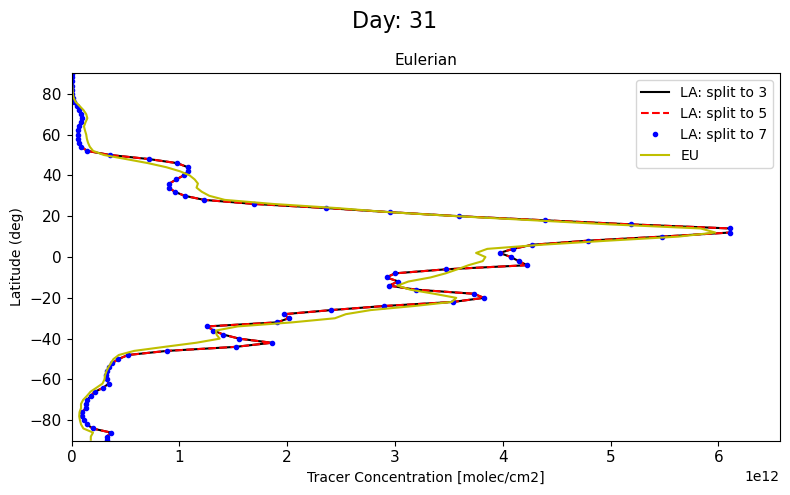

In [9]:
fig = plt.figure(figsize=(8,5),dpi=100);
#     gs = fig.add_gridspec(15, 8)
i=Nt-1
plt.suptitle('Day: '+str(i+1), fontsize=16);


    
plt.plot(LA1_Zsum_Xmean[i,:], lat1, 'k', label='LA: split to 3');
plt.plot(LA2_Zsum_Xmean[i,:], lat2, 'r--', label='LA: split to 5');
plt.plot(LA3_Zsum_Xmean[i,:], lat1, 'b.', label='LA: split to 7');
plt.plot(EU1_Zsum_Xmean[i,:], lat2, 'y', label='EU');



X_max = np.max(LA1_Zsum_Xmean[:,:],axis=(0,1)) # 16.5e+11;
plt.xlim(0,X_max);
plt.ylim(-90,90);

plt.xlabel('Tracer Concentration [molec/cm2]');
plt.ylabel('Latitude (deg)');
plt.tick_params(axis='x', labelsize=11)  # to Set Matplotlib Tick Labels Font Size
plt.tick_params(axis='y', labelsize=11)
plt.legend()
plt.title('Eulerian', fontsize=11);
    
    
plt.tight_layout()


In [10]:
Num1_plume = []
Num1_2D = []
Num1_1D = []
Num1_dissolved = []

days = np.arange(1,32,1)

FILEDIR1 = '/n/home12/hongwei/HONGWEI/sensitive_test/1D_plume_split_number/merra2_2x25_standard_N3/'

for i in days:
    Filenames = f'Lagrange_xyz_2015-1-{i}-0:0:0.txt'

    df1 = pd.read_fwf(FILEDIR1+Filenames, header=None)
    Num1_plume.append(len(df1))
    
    
    num1 = df1[2].value_counts() 
    
    if 2 in num1.index:
        Num1_2D.append(num1[2])
    else:
        Num1_2D.append(0)
        
    if 1 in num1.index:
        Num1_1D.append(num1[1])
    else:
        Num1_1D.append(0)
            
    if 0 in num1.index:
        Num1_dissolved.append(num1[0])
    else:
        Num1_dissolved.append(0)
    
    if sum(num1)!=len(df1): print('ERROR')
        
    
    if i==31: lifetime1 = df1[1]
        
        

df1 = pd.read_fwf(FILEDIR1+'Lagrange_xyz_2015-2-1-0:0:0.txt', header=None)


Num1_plume.append(len(df1))
    
    
num1 = df1[2].value_counts() 
    
if 2 in num1.index:
    Num1_2D.append(num1[2])
else:
    Num1_2D.append(0)
        
if 1 in num1.index:
    Num1_1D.append(num1[1])
else:
    Num1_1D.append(0)
            
if 0 in num1.index:
    Num1_dissolved.append(num1[0])
else:
    Num1_dissolved.append(0)
    
if sum(num1)!=len(df1): print('ERROR')

In [11]:
Num2_plume = []
Num2_2D = []
Num2_1D = []
Num2_dissolved = []

days = np.arange(1,32,1)

FILEDIR2 = '/n/home12/hongwei/HONGWEI/sensitive_test/1D_plume_split_number/merra2_2x25_standard_N5/'

for i in days:
    Filenames = f'Lagrange_xyz_2015-1-{i}-0:0:0.txt'

    df2 = pd.read_fwf(FILEDIR2+Filenames, header=None)
    Num2_plume.append(len(df2))
    
    
    num2 = df2[2].value_counts() 
    
    if 2 in num2.index:
        Num2_2D.append(num2[2])
    else:
        Num2_2D.append(0)
        
    if 1 in num2.index:
        Num2_1D.append(num2[1])
    else:
        Num2_1D.append(0)
            
    if 0 in num2.index:
        Num2_dissolved.append(num2[0])
    else:
        Num2_dissolved.append(0)
    
    if sum(num2)!=len(df2): print('ERROR')
        
    
    if i==31: lifetime2 = df2[1]
        
        

df2 = pd.read_fwf(FILEDIR2+'Lagrange_xyz_2015-2-1-0:0:0.txt', header=None)


Num2_plume.append(len(df2))
    
    
num2 = df2[2].value_counts() 
    
if 2 in num2.index:
    Num2_2D.append(num2[2])
else:
    Num2_2D.append(0)
        
if 1 in num2.index:
    Num2_1D.append(num2[1])
else:
    Num2_1D.append(0)
            
if 0 in num2.index:
    Num2_dissolved.append(num2[0])
else:
    Num2_dissolved.append(0)
    
if sum(num2)!=len(df2): print('ERROR')

In [12]:
Num3_plume = []
Num3_2D = []
Num3_1D = []
Num3_dissolved = []

days = np.arange(1,32,1)

FILEDIR3 = '/n/home12/hongwei/HONGWEI/sensitive_test/1D_plume_split_number/merra2_2x25_standard_N7/'

for i in days:
    Filenames = f'Lagrange_xyz_2015-1-{i}-0:0:0.txt'

    df3 = pd.read_fwf(FILEDIR3+Filenames, header=None)
    Num3_plume.append(len(df3))
    
    
    num3 = df3[2].value_counts() 
    
    if 2 in num3.index:
        Num3_2D.append(num3[2])
    else:
        Num3_2D.append(0)
        
    if 1 in num3.index:
        Num3_1D.append(num3[1])
    else:
        Num3_1D.append(0)
            
    if 0 in num3.index:
        Num3_dissolved.append(num3[0])
    else:
        Num3_dissolved.append(0)
    
    if sum(num3)!=len(df3): print('ERROR')
        
    
    if i==31: lifetime3 = df3[1]
        
        

df3 = pd.read_fwf(FILEDIR3+'Lagrange_xyz_2015-2-1-0:0:0.txt', header=None)


Num3_plume.append(len(df3))
    
    
num3 = df3[2].value_counts() 
    
if 2 in num3.index:
    Num3_2D.append(num3[2])
else:
    Num3_2D.append(0)
        
if 1 in num3.index:
    Num3_1D.append(num3[1])
else:
    Num3_1D.append(0)
            
if 0 in num3.index:
    Num3_dissolved.append(num3[0])
else:
    Num3_dissolved.append(0)
    
if sum(num3)!=len(df3): print('ERROR')

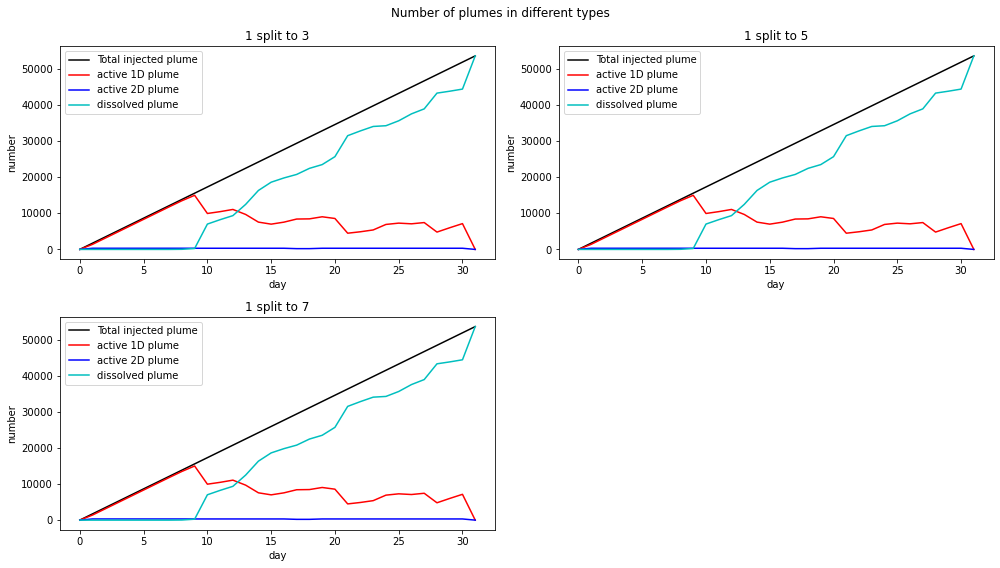

In [27]:
fig = plt.figure(figsize=(14,8));
#     gs = fig.add_gridspec(15, 8)

ax1 = plt.subplot(2,2,1);
ax1.plot(Num1_plume, 'k', label='Total injected plume')
ax1.plot(Num1_1D, 'r', label='active 1D plume')
ax1.plot(Num1_2D, 'b', label='active 2D plume')
ax1.plot(Num1_dissolved, 'c', label='dissolved plume')
ax1.set_xlabel('day')
ax1.set_ylabel('number')
ax1.set_title('1 split to 3')
ax1.legend()

ax2 = plt.subplot(2,2,2);
ax2.plot(Num2_plume, 'k', label='Total injected plume')
ax2.plot(Num2_1D, 'r', label='active 1D plume')
ax2.plot(Num2_2D, 'b', label='active 2D plume')
ax2.plot(Num2_dissolved, 'c', label='dissolved plume')
ax2.set_xlabel('day')
ax2.set_ylabel('number')
ax2.set_title('1 split to 5')
ax2.legend()

ax3 = plt.subplot(2,2,3);
ax3.plot(Num3_plume, 'k', label='Total injected plume')
ax3.plot(Num3_1D, 'r', label='active 1D plume')
ax3.plot(Num3_2D, 'b', label='active 2D plume')
ax3.plot(Num3_dissolved, 'c', label='dissolved plume')
ax3.set_xlabel('day')
ax3.set_ylabel('number')
ax3.set_title('1 split to 7')
ax3.legend()

plt.suptitle('Number of plumes in different types')
plt.tight_layout()



In [14]:
compare = Num1_plume==Num3_plume
compare

True

2.5

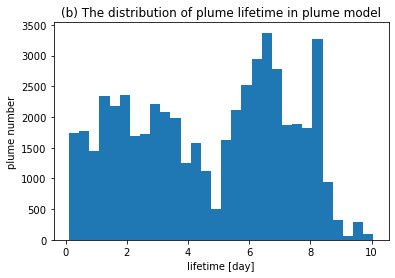

In [16]:
plt.hist(lifetime1, bins=30)
plt.xlabel('lifetime [day]');
plt.ylabel('plume number');
plt.title('(b) The distribution of plume lifetime in plume model');
lifetime1.min()*24 # hour

2.5

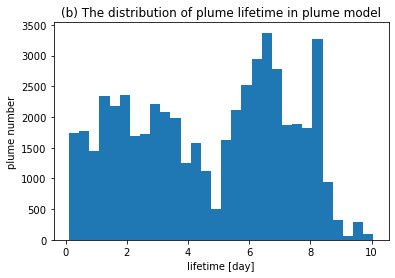

In [17]:
plt.hist(lifetime2, bins=30)
plt.xlabel('lifetime [day]');
plt.ylabel('plume number');
plt.title('(b) The distribution of plume lifetime in plume model');
lifetime2.min()*24 # hour

2.5

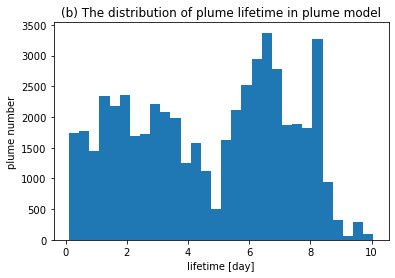

In [18]:
plt.hist(lifetime3, bins=30)
plt.xlabel('lifetime [day]');
plt.ylabel('plume number');
plt.title('(b) The distribution of plume lifetime in plume model');
lifetime3.min()*24 # hour